## Gradient Descent
#### Gavin Daves, Rice University
#### INDE 577, Dr. Randy Davila

In this notebook, we will implement gradient descent in Python and then use it on a Linear Regression (see 2.5) model of features in the Spotify dataset.

In [82]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sys

sns.set_theme()
from sklearn.metrics import mean_squared_error

In [83]:
def batch_gradient_descent(X, y, alpha=0.05, epochs=10):
    """
    Performs the batch gradient descent algorithm.
    Inputs:
    - X: the feature matrix
    - y: the target values
    - alpha: the learning rate
    - epochs: the maximum number of iterations
    
    Returns:
    - w: the best-fit weights
    - mse: the mean squared error of the best-fit line
    - mse_values: the mean squared error at each iteration
    """
    
    mse_values = []
    
    # Initialize the weights
    w = np.random.rand(X.shape[1] + 1)
    n = len(X) 
    
    for _ in range(epochs):
        mse_values.append(mean_squared_error(y, np.dot(X, w[:-1]) + w[-1]))
        
        # Compute the predictions
        y_pred = np.dot(X, w[:-1]) + w[-1]
        
        # Compute derivatives
        
        dw = -2/n * np.dot(X.T, y - y_pred)
        db = -2/n * np.sum(y - y_pred)
            
        
        # Update the weights
        w[:-1] -= alpha * dw
        w[-1] -= alpha * db

        if np.linalg.norm(dw) < 1e-3:
            break
    
    mse = mean_squared_error(y, y_pred)
        
    return w, mse, mse_values
    

In [84]:
def stochastic_gradient_descent(X, y, alpha=0.05, epochs=10):
    """
    Performs the stochastic gradient descent algorithm.
    Inputs:
    - X: the feature matrix
    - y: the target values
    - alpha: the learning rate
    - epochs: the maximum number of iterations
    
    Returns:
    - w: the best-fit weights
    - mse: the mean squared error of the best-fit line
    - mse_values: the mean squared error at each iteration
    """
    
    mse_values = []
    
    # Initialize the weights
    w = np.random.rand(X.shape[1] + 1)
    n = len(X) 
    
    for _ in range(epochs):
        mse_values.append(mean_squared_error(y, np.dot(X, w[:-1]) + w[-1]))
        
        for i in range(n):
            # Compute the predictions
            y_pred = np.dot(X[i], w[:-1]) + w[-1]
        
            # Compute derivatives
            dw = -2 * X[i] * (y[i] - y_pred)
            db = -2 * (y[i] - y_pred)
            
            # Update the weights
            w[:-1] -= alpha * dw
            w[-1] -= alpha * db

        if np.linalg.norm(dw) < 1e-3:
            break
    
    mse = mean_squared_error(y, np.dot(X, w[:-1]) + w[-1])
        
    return w, mse, mse_values

### Background

My favorite music group of all time is The Beatles. Their revolutionary sound and incredibly produced music has always appealed to me, and they have topped my Spotify wrapped for years on end now. So, I wanted to see if the energy they bring to their songs have anything to do with how loud the song is (songs like I Want You, Oh! Darling, and Twist and Shout made me think of this). So to use gradient descent, we will investigate Loudness vs. Energy in The Beatles songs via Linear Regression, and investigate the change in MSE over time.

In [85]:
# Loading the data

# Add the top-level directory to the system path
sys.path.append('../../')

# Load the data
import clean_data as sd

df = sd.get_df()

# Make a subset of the data that only contains The Beatles
beatles = df[df['artists'] == 'The Beatles']

Text(0.5, 1.0, 'Loudness vs Energy in Beatles Songs')

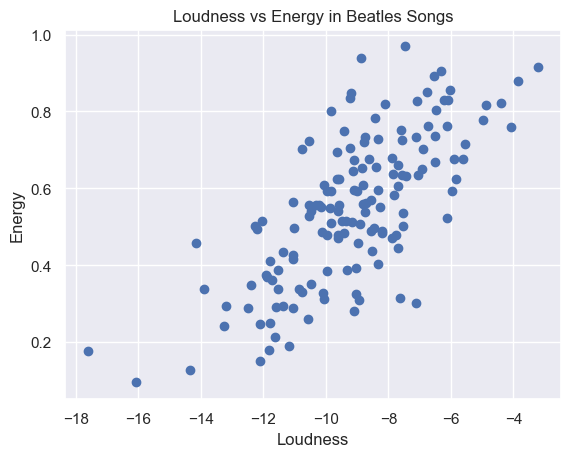

In [86]:
# Plot the loudness and energy of The Beatles songs
plt.plot(beatles['loudness'], beatles['energy'], 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.title('Loudness vs Energy in Beatles Songs')

In [87]:
# Using gradient descent to fit a line to the data
X = beatles['loudness'].values.reshape(-1, 1)

# Multiply the energy by 100 to make the scale similar to loudness
y = 100*beatles['energy'].values

bw, bmse, bmse_values = batch_gradient_descent(X, y, alpha=0.005, epochs=10000)
sw, smse, smse_values = stochastic_gradient_descent(X, y, alpha=0.005, epochs=10000)

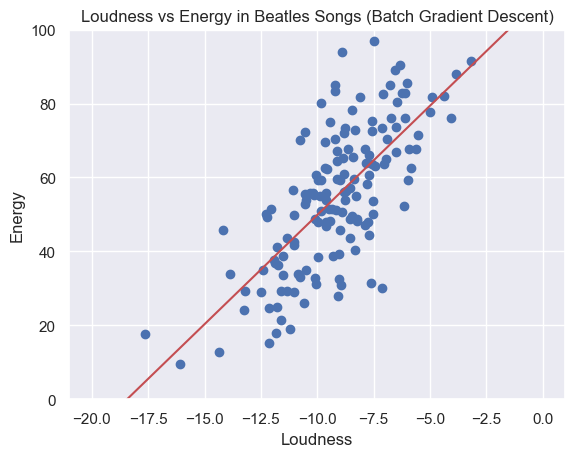

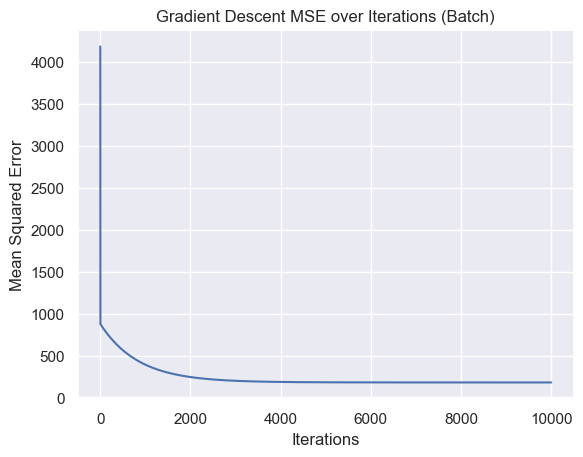

In [88]:
# Plot the data and the best-fit line for batch gradient descent
plt.plot(X, y, 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.ylim(0, 100)
plt.title('Loudness vs Energy in Beatles Songs (Batch Gradient Descent)')

# Plot the best-fit line
x = np.linspace(-20, 0, 100)
y_pred = bw[0] * x + bw[1] 
plt.plot(x, y_pred, color='r')
plt.show()

# Plot the mean squared error over iterations to see if the algorithm is converging
iter_vector = np.arange(1, len(bmse_values) +1)
plt.plot(iter_vector, bmse_values)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent MSE over Iterations (Batch)')
plt.show()

### Error Analysis for Batch Gradient Descent

As can be seen in the first plot, the Linear Regression model accurately fits the data. Further, in the second plot, we can see that over time, the MSE began to converge to a small value. Overall, we can see that this is a relatively accurate model, and that Gradient Descent successfully found the weights that minimize the MSE.

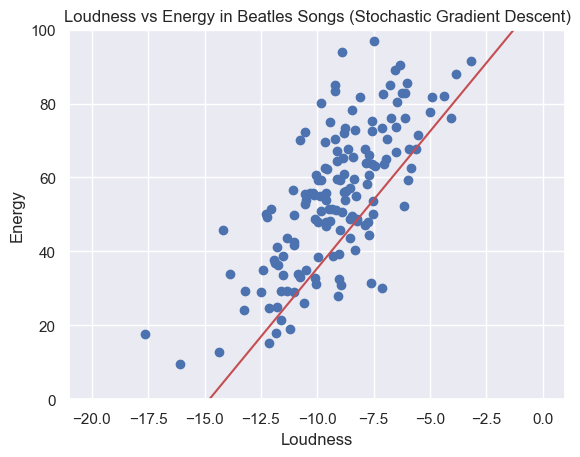

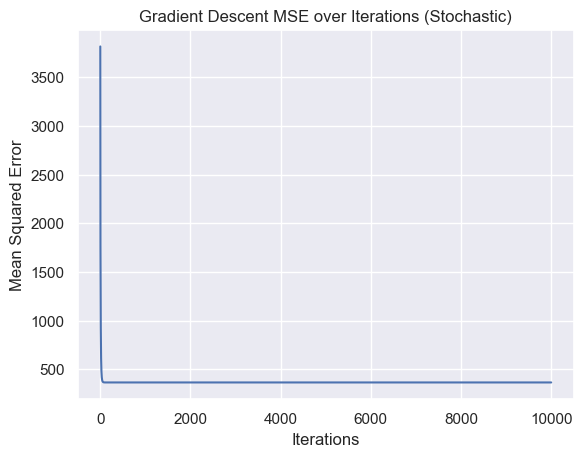

In [89]:
# Plot the data and the best-fit line for stochastic gradient descent
plt.plot(X, y, 'o')
plt.xlabel('Loudness')
plt.ylabel('Energy')
plt.ylim(0, 100)
plt.title('Loudness vs Energy in Beatles Songs (Stochastic Gradient Descent)')

# Plot the best-fit line
x = np.linspace(-20, 0, 100)
y_pred = sw[0] * x + sw[1]
plt.plot(x, y_pred, color='r')
plt.show()

# Plot the mean squared error over iterations to see if the algorithm is converging
iter_vector = np.arange(1, len(smse_values) +1)
plt.plot(iter_vector, smse_values)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.title('Gradient Descent MSE over Iterations (Stochastic)')
plt.show()

### Error Analysis for Stochastic Gradient Descent

As can be seen in the first plot, the Linear Regression model could fit the data better. The bias looks to be a little too low, which could be from the additional updates that stochastic gradient descent performs. Further, in the second plot, we can see that over time, the MSE began to converge to a small value (in fact, much faster than the batch gradient descent). Overall, we can see that this is a worse model than the Batch Gradent Descent one, but it did converge much quicker.